# Practica 3 - Correlación.

**Author:** Cristian David Araujo A.

**ID:** 1089568350

**Date:** 04/09/2024



## Analisis de pulsos de radar

### 1. Genere un pulso rectangular de 30 muestras. Tip: Utilice la función de numpy np.ones(30).

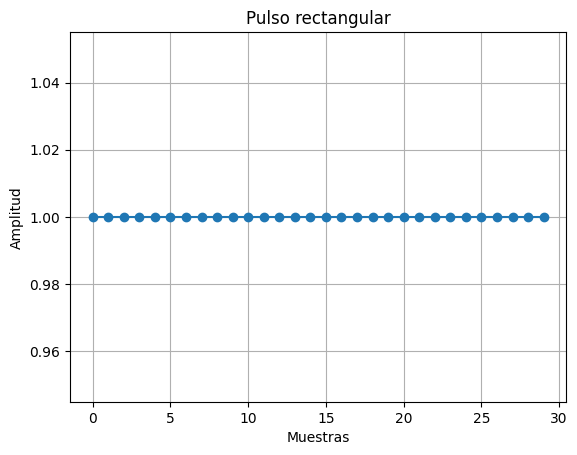

In [1]:
### 1. Genere un pulso rectangular de 30 muestras. Tip: Utilice la función de numpy np.ones(30).

import numpy as np
import matplotlib.pyplot as plt

# Genero el pulso rectangular
rectangular_pulse = np.ones(30)

# Grafico el pulso rectangular con las muestras descartadas
plt.plot(rectangular_pulse, 'o-')
plt.title("Pulso rectangular")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid()
plt.show()


### 2. Calcule y grafique la función de autocorrelación del pulso generado (use plt.stem)

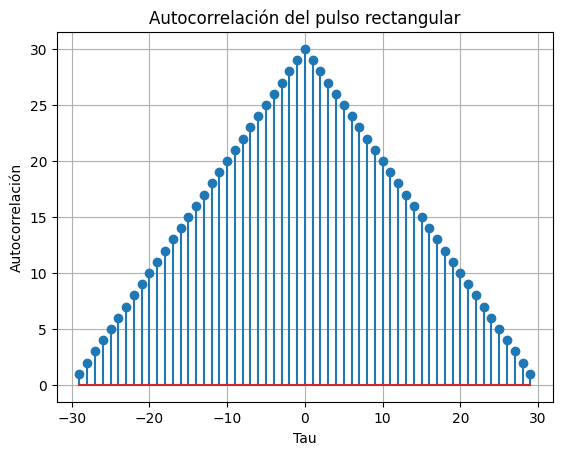

In [2]:
### 2. Calcule y grafique la función de autocorrelación del pulso generado (use plt.stem)

# Calculo la autocorrelación
autocorrelation = np.correlate(rectangular_pulse, rectangular_pulse, mode='full')
tau = np.arange(-len(rectangular_pulse)+1, len(rectangular_pulse), 1) # Rango de tau

# Grafico la autocorrelación
plt.stem(tau, autocorrelation)
plt.title("Autocorrelación del pulso rectangular")
plt.xlabel("Tau")
plt.ylabel("Autocorrelación")
plt.grid()
plt.show()

Conclusión: La autocorrelación del pulso rectangular es un pulso triangular, en donde el máximo se encuentra en tau=0 y el valor de la autocorrelación es 30. Este punto de mayor simetria es la energía del pulso

### 3. Utilice la función delay noise incluida en la librería adjunta ’utils.py’ para simular el ruido introducido por el canal, y el desfase de la señal recibida respecto a la original. Grafique el resultado, ¿Es capaz de distinguir el pulso y decir cuanto es su retraso?

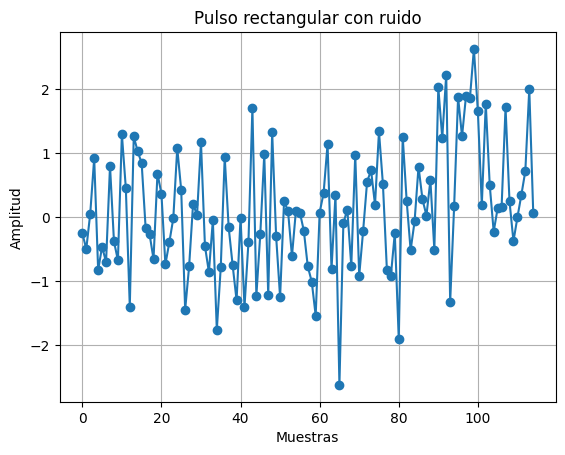

Cantidad de muestras de la señal con ruido:  115


In [3]:
### 3. Utilice la función delay noise incluida en la librería adjunta ’utils.py’ para simular el ruido introducido por el canal, y el desfase de la se˜nal recibida respecto a la original. Grafique el resultado, ¿Es capaz de distinguir el pulso y decir cuanto es su retraso?

import utils as ut

noise_signal=ut.delay_noise(rectangular_pulse)

#Gráfico de la señal con ruido
plt.plot(noise_signal, 'o-')
plt.title("Pulso rectangular con ruido")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

#Cantidad de muestras de la señal con ruido
print("Cantidad de muestras de la señal con ruido: ", len(noise_signal))

Luego de la simulación de ruido, es dificil distinguir el pulso rectangular original y decir cuanto es su retraso dada la cantidad de ruido introducido.

### 4. Utilice la función de numpy np.correlate para hallar la correlación entre la señal distorsionada y la señal original. Muestre el resultado gráficamente ¿Cuál es el retraso? ¿Qué se puede concluir?

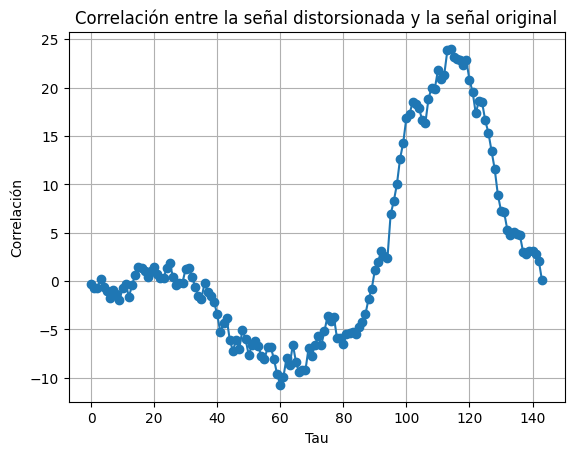

El retraso es de 85 muestras
Cantidad de muestras de la correlación:  144


In [4]:
### 4. Utilice la función de numpy np.correlate para hallar la correlación entre la señal distorsionada y la señal original. Muestre el resultado gráficamente ¿Cuál es el retraso? ¿Qué se puede concluir?

correlation = np.correlate(noise_signal, rectangular_pulse, mode='full')
#Calculo de tau
tau = np.arange( -len(rectangular_pulse)+1, len(noise_signal), 1)

# Grafico la correlación
plt.plot(correlation, 'o-')
plt.title("Correlación entre la señal distorsionada y la señal original")
plt.xlabel("Tau")
plt.ylabel("Correlación")
plt.grid()
plt.show()

#Calculo el retraso
delay = tau[np.argmax(correlation)]
print("El retraso es de", delay, "muestras")

#Cantidad de muestras de la correlación
print("Cantidad de muestras de la correlación: ", len(correlation))



Para encontrar el retraso de la señal distorsionada respecto a la original, se calcula la correlación entre ambas señales y ademas encontramos el valor de tau que maximiza la correlación. Obteniendo así el retraso de la señal distorsionada respecto a la original.

## Análisis de Señales de Marcha

El archivo gaitSignal.txt contiene señales de varios sensores: acelerómetros, giróscopos y magnetómetros, capturados durante la actividad física de caminar en una cinta caminadora. Cada sensor se encarga de capturar tres señales, una en cada eje: x,y,z. A los participantes se les pusieron 5 sensores, para un total de 45 señales simultáneas. La frecuencia de muestreo es de 25Hz.

Desarrolle un código que cargue la señal adjunta, y seleccione el canal correspondiente: T_zgyro

### 1. Procedimiento

En esta sección vamos a determinar el periodo cuando la persona realiza actividades físicas. Para ello se utilizará la autocorrelación de la señal. En la mayoría de señales reales el periodo no se puede determinar directamente de la señal; sin embargo, este se puede estimar analizando la autocorrelación de la señal hallando la diferencia entre picos consecutivos de la señal de auto-correlación.

#### 1.1. Normalice la señal restándole la media y luego dividiendo por su máximo valor absoluto (Recuerde del laboratorio 2). Luego, grafique la señal asignada en función del tiempo y presente un breve análisis sobre la misma.

0    0.089312
1    0.058186
2    0.048346
3    0.126940
4    0.139410
5    0.132130
6    0.091282
7   -0.126290
8   -0.410320
9   -0.261590
Name: T_zgyro, dtype: float64


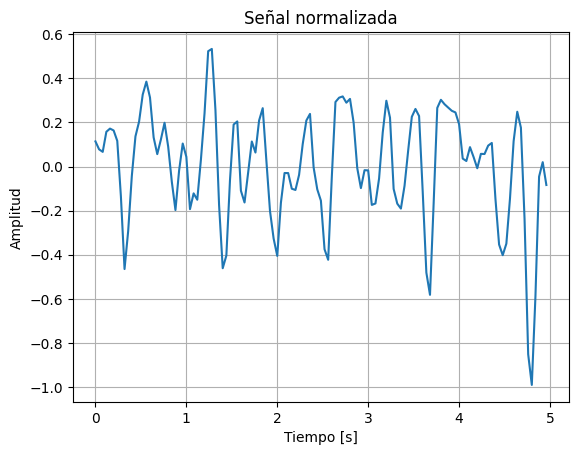

In [5]:
#### 1.1. Normalice la señal restándole la media y luego dividiendo por su máximo valor absoluto (Recuerde del laboratorio 2). Luego, grafique la señal asignada en función del tiempo y presente un breve análisis sobre la misma.

import pandas as pd
csv_path = 'gaitSignal.txt'
data = pd.read_csv(csv_path)
fs = 25 # Frecuencia de muestreo

# Extraigo la señal de interés
data_Tzgyro = data['T_zgyro']
t = np.arange(0, len(data_Tzgyro)/fs, 1/fs)

#Show the first 10 samples
print(data_Tzgyro[:10])

# Normalizo la señal
data_Tzgyro = (data_Tzgyro - data_Tzgyro.mean()) / (data_Tzgyro.abs().max())

# Grafico la señal
plt.plot(t, data_Tzgyro)
plt.title("Señal normalizada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

Se identifica cierta periodicidad en la señal. Como la señal representa el movimiento de una persona al caminar, se puede inferir que la periodicidad se debe a la repetición de los pasos.

#### 1.2. ¿Cuál es el periodo de muestreo de la señal?

In [6]:
#### 1.2. ¿Cuál es el periodo de muestreo de la señal?

print("El periodo de muestreo de la señal es de", 1/fs, "segundos")

El periodo de muestreo de la señal es de 0.04 segundos


#### 1.3. Calcule la autocorrelación de la señal obtenida y grafiquela. ¿Qué se puede concluir?

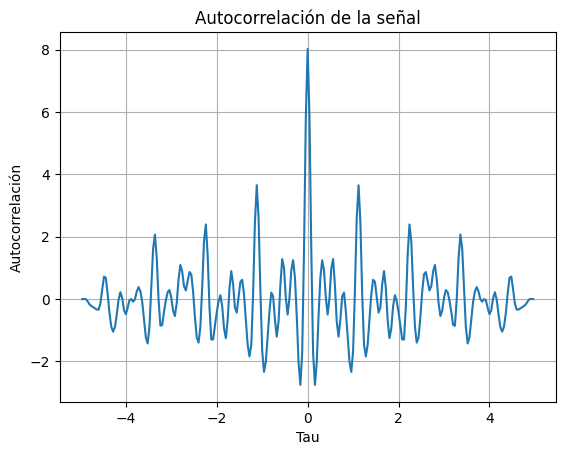

In [7]:
#### 1.3. Calcule la autocorrelación de la señal obtenida y grafiquela. ¿Qué se puede concluir?

# Calculo la autocorrelación
data_Tzgyro_autocorrelation = np.correlate(data_Tzgyro, data_Tzgyro, mode='full')
tau = np.arange(-len(data_Tzgyro)+1, len(data_Tzgyro), 1) # Rango de tau

# Convertir tau a tiempo
tau = tau/fs


# Grafico la autocorrelación
plt.plot(tau, data_Tzgyro_autocorrelation)
plt.title("Autocorrelación de la señal")
plt.xlabel("Tau")
plt.ylabel("Autocorrelación")
plt.grid()
plt.show()


En la grafica de la autocorrelación se puede observar que la señal tiene cierta periodicidad, esto se interpreta debido a que se evidencian picos periodicos en la autocorrelación.

#### 1.4. Realice un zoom de la autocorelación entre 0 y 2.

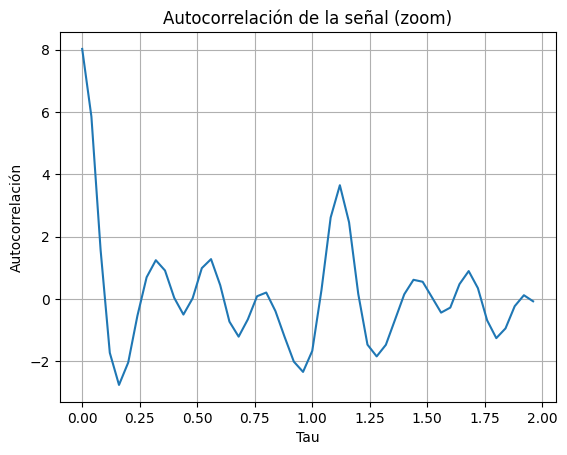

In [8]:
#### 1.4. Realice un zoom de la autocorelación entre 0 y 2.

# Calcula el índice de la muestra correspondiente a 2 segundos
index_2s = int(2*fs)

# Segmento la autocorrelación entre 0 y 2 segundos
tau_zoom = tau[tau >= 0]
tau_zoom = tau_zoom[:index_2s]
data_Tzgyro_autocorrelation_zoom = data_Tzgyro_autocorrelation[tau >= 0]
data_Tzgyro_autocorrelation_zoom = data_Tzgyro_autocorrelation_zoom[:index_2s]

# Grafico la autocorrelación
plt.plot(tau_zoom, data_Tzgyro_autocorrelation_zoom)
plt.title("Autocorrelación de la señal (zoom)")
plt.xlabel("Tau")
plt.ylabel("Autocorrelación")
plt.grid()
plt.show()


### 2. Medición del periodo de la señal

El periodo de la señal corresponde al tiempo entre 0 y la posición del primer pico de la función de autocorrelación. Ya que es donde se encuentra la máxima similitud de las señales cuando van ocurriendo los desplazamientos.

#### 2.1. Determine e indique el periodo de la señal a partir del tiempo para el primer máximo global de la autocorrelación después de cero.

In [9]:
#### 2.1. Determine e indique el periodo de la señal a partir del tiempo para el primer máximo global de la autocorrelación después de cero.

# Calculo el primer minimo global
index_first_global_min = np.argmin(data_Tzgyro_autocorrelation_zoom)

# Calculo el máximo después del primer mínimo global
index_first_global_max = index_first_global_min + np.argmax(data_Tzgyro_autocorrelation_zoom[index_first_global_min:])
period = tau_zoom[index_first_global_max]

print("El periodo de la señal es de", period, "segundos")


El periodo de la señal es de 1.12 segundos


Esta periodicidad nos da una idea de la frecuencia de paso de la persona que lleva el dispositivo, ya que la señal es un giroscopio en el eje z, y al caminar, la persona realiza un movimiento oscilatorio que se repite cada cierto tiempo.

## Conclusiones

- La correlación entre señales es muy util en los sistemas de radar para detectar y localizar objetos. Al comparar la señal transmitida con la señal recibida (que puede estar reflejada por un objeto), la correlación permite identificar la presencia del objeto, su distancia, y en algunos casos, su velocidad. La correlación cruzada, en particular, ayuda a distinguir la señal de interés del ruido, mejorando la precisión de la detección.

- La energía de una señal puede ser estimada a través de la autocorrelación, ya que esta operación mide la similitud de la señal consigo misma en diferentes instantes de tiempo. Para señales finitas, la autocorrelación en el lag cero proporciona un valor directamente relacionado con la energía total de la señal. Este método es útil en aplicaciones como el análisis de señales de audio o telecomunicaciones, donde la energía es un indicador clave de la calidad o potencia de la señal.

- La correlación es una herramienta eficaz para determinar la periodicidad de una señal, como en el caso de un giroscopio que mide el movimiento de una persona. Al analizar la autocorrelación de la señal del giroscopio, es posible identificar patrones repetitivos que corresponden al ciclo de paso de una persona. Esta información es de utilidad en aplicaciones como la biomecánica y el monitoreo de la actividad física, donde la identificación precisa de la periodicidad del movimiento permite evaluar el ritmo de marcha o detectar anomalías en el movimiento.